In [1]:
from google.colab import files
files.upload()


Saving luffy-pictures-22osajj9ivjfcm49.jpg to luffy-pictures-22osajj9ivjfcm49.jpg


{'luffy-pictures-22osajj9ivjfcm49.jpg': b'\xff\xd8\xff\xdb\x00C\x00\r\r\r\r\x0e\r\x0e\x10\x10\x0e\x14\x16\x13\x16\x14\x1e\x1b\x19\x19\x1b\x1e- " " -D*2**2*D<I;7;I<lUKKUl}ici}\x97\x87\x87\x97\xbe\xb5\xbe\xf9\xf9\xff\xff\xdb\x00C\x01\r\r\r\r\x0e\r\x0e\x10\x10\x0e\x14\x16\x13\x16\x14\x1e\x1b\x19\x19\x1b\x1e- " " -D*2**2*D<I;7;I<lUKKUl}ici}\x97\x87\x87\x97\xbe\xb5\xbe\xf9\xf9\xff\xff\xc2\x00\x11\x08\x048\x07\x80\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf6\xf9\xf4\xd5h\xb5\xa2\xca4\x92\xd2\xc0e\xc3\x18\x01\x06FU\x91\x95B\x86\x86\xa5\x0e,\xb2\xcb\x18$\x91a`\x01*3%X\x14i\x161\x8c\xb1\x18GY$\x19VfU\x04\x08e\xad@X\xe2\xca\xaa(\x10\xa4\x03\xa4\x00\x08P\x00\x00\x80\x00\x00\x00\x00\x80t\x00\x00\x84\x00\x00\x00\x001\x02

In [2]:
import os
os.listdir()


['.config', 'luffy-pictures-22osajj9ivjfcm49.jpg', 'sample_data']

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

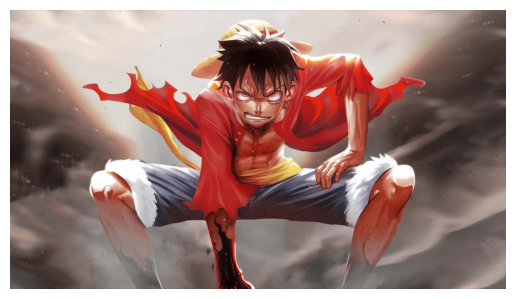

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("luffy-pictures-22osajj9ivjfcm49.jpg")  # <-- use exact name

if img is None:
    raise ValueError("Image not loaded. Check file name or path.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

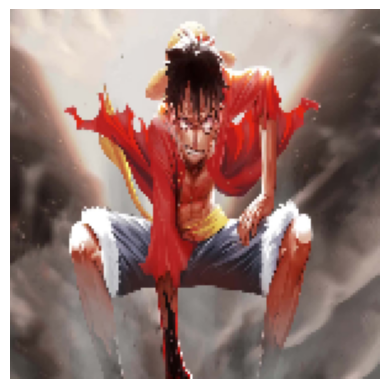

In [4]:
img_small = cv2.resize(img, (150, 150))
plt.imshow(img_small)
plt.axis("off")

In [6]:
import numpy as np


In [7]:
h, w, c = img_small.shape
X = img_small.reshape(-1, 3)   # (pixels, RGB)
X = X.astype(np.float32)
print(X.shape)


(22500, 3)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X)


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

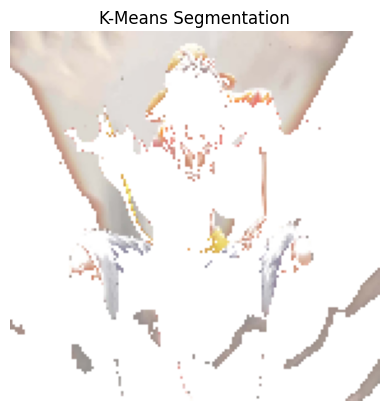

In [9]:
seg_km = X.copy()
seg_km[labels_km == 1] = [255, 255, 255]

seg_km = seg_km.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_km)
plt.title("K-Means Segmentation")
plt.axis("off")


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

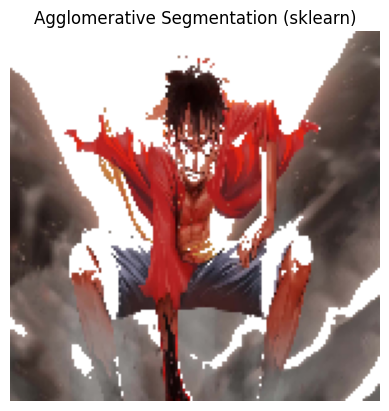

In [10]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X)

seg_agg = X.copy()
seg_agg[labels_agg == 1] = [255, 255, 255]

seg_agg = seg_agg.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_agg)
plt.title("Agglomerative Segmentation (sklearn)")
plt.axis("off")


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

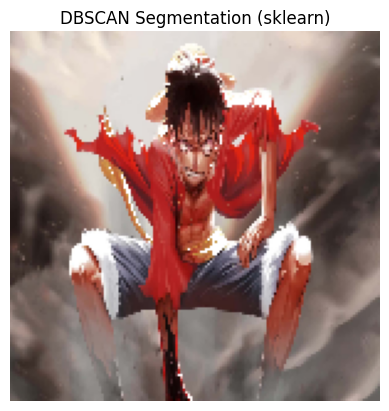

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15, min_samples=50)
labels_db = dbscan.fit_predict(X)

seg_db = X.copy()
seg_db[labels_db != 0] = [255, 255, 255]

seg_db = seg_db.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_db)
plt.title("DBSCAN Segmentation (sklearn)")
plt.axis("off")


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

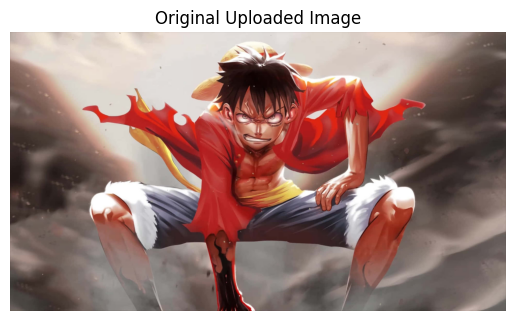

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("luffy-pictures-22osajj9ivjfcm49.jpg")   # <-- change name if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resize for speed
img_small = cv2.resize(img, (20, 20))  # 400 pixels only


plt.imshow(img)
plt.title("Original Uploaded Image")
plt.axis("off")


In [2]:
h, w, _ = img_small.shape
X = img_small.reshape(-1, 3).astype(np.float32)



In [3]:
def custom_agglomerative_safe(X, k=2):
    clusters = [[i] for i in range(len(X))]

    while len(clusters) > k:
        min_dist = np.inf
        pair = (0, 1)

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                # centroid distance instead of full pairwise
                ci = np.mean(X[clusters[i]], axis=0)
                cj = np.mean(X[clusters[j]], axis=0)
                d = np.linalg.norm(ci - cj)

                if d < min_dist:
                    min_dist = d
                    pair = (i, j)

        clusters[pair[0]] += clusters[pair[1]]
        clusters.pop(pair[1])

    labels = np.zeros(len(X), dtype=int)
    for i, cl in enumerate(clusters):
        for idx in cl:
            labels[idx] = i

    return labels



(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

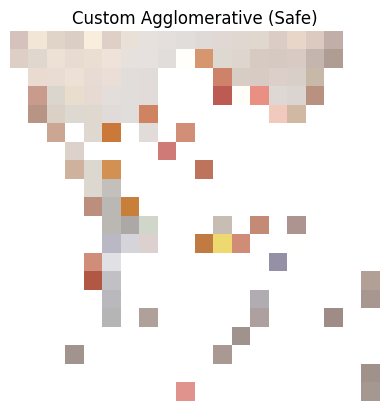

In [4]:
labels_agg = custom_agglomerative_safe(X, 2)

seg_agg = X.copy()
seg_agg[labels_agg == 1] = [255, 255, 255]
seg_agg = seg_agg.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_agg)
plt.title("Custom Agglomerative (Safe)")
plt.axis("off")



In [5]:
def custom_dbscan(X, eps=20, min_pts=5):
    n = len(X)
    labels = np.full(n, -1)
    cluster_id = 0

    def region_query(i):
        return [j for j in range(n) if np.linalg.norm(X[i] - X[j]) < eps]

    for i in range(n):
        if labels[i] != -1:
            continue

        neighbors = region_query(i)
        if len(neighbors) < min_pts:
            labels[i] = -2  # noise
            continue

        labels[i] = cluster_id
        stack = neighbors[:]

        while stack:
            j = stack.pop()
            if labels[j] == -2:
                labels[j] = cluster_id
            if labels[j] != -1:
                continue

            labels[j] = cluster_id
            new_neighbors = region_query(j)
            if len(new_neighbors) >= min_pts:
                stack.extend(new_neighbors)

        cluster_id += 1

    return labels


(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

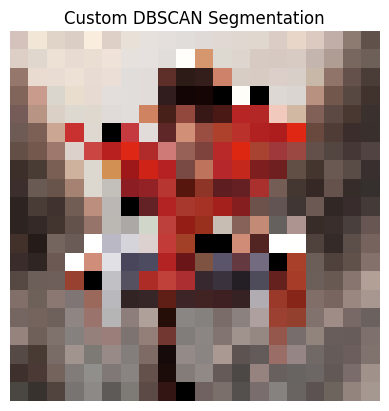

In [6]:
labels_db = custom_dbscan(X, eps=25, min_pts=4)

seg_db = X.copy()
seg_db[labels_db == -2] = [0, 0, 0]  # noise black

seg_db = seg_db.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_db)
plt.title("Custom DBSCAN Segmentation")
plt.axis("off")
